## Assignment 1 Computational Machine Learning
#### Sam Peterson
#### 8th April 2024

In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [452]:
# Dropping the 'ID' coloumn in both datasets as it is redundant.
# Reading the train and test datasets into the notebook
train_data = pd.read_csv(r"C:\Users\User\Desktop\Computational Machine Learning\Assignment 1\dataset\train.csv")
test_data = pd.read_csv(r"C:\Users\User\Desktop\Computational Machine Learning\Assignment 1\dataset\test.csv")


train_data = train_data.drop(columns=['ID'])





### Checking the first three rows of the train and test datasets. 
- This is done mainly to check that the data has loaded in correctly. We can also see a small sample of the values that populate each row.
- We can also get an intial look at the scale of the feature values 


In [453]:
train_data.head(3)

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,67.1,146,2017,0,263,262,264,62,0.01,71.279624,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,59.8,146,2016,0,271,278,264,64,0.01,73.523582,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,57.6,146,2015,0,268,246,290,66,0.01,73.219243,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427


In [454]:
test_data.head(3)

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,120,2017,0,335,314,356,66,6.35,0.000000,...,7.0,3.84,64,1.9,4139.29,2785935.0,8.3,8.2,0.531,3.376389
1,2,120,2016,0,348,338,358,67,8.33,23.965612,...,68.0,3.31,64,2.0,536.83,2692466.0,8.5,8.3,0.527,3.376389
2,3,120,2015,0,355,362,348,69,8.10,35.958573,...,67.0,4.26,77,2.3,542.77,2599834.0,8.6,8.5,0.523,3.376389



### Checking the dimensions of the datasets.

- We can see that the training data set contains 2071 rows and 23 columns and the test data. The test set contains 867 rows and 22 columns. The difference in columns is because the test set is missing the TARGET variable which we will predict.

In [455]:
print("train_dataset dimentions:")
train_data.shape


train_dataset dimentions:


(2071, 23)

In [456]:
print("test_dataset dimentions:")
test_data.shape

test_dataset dimentions:


(867, 23)


### Looking at the summary statistics of the two datasets.

- We can see that there is a large variation in the values associated with each column when we look at the means between the variables such as population with a mean value of 1.203741e+07 and status with a mean value of 0.185418 we can see that the scale between the variables values differentiate from each other to a large degree. We can also identify from comparing the train and test data that the the two datasets demonstrate congruence, as evidenced by the almost identical summary statistics across all variables. The means, standard deviations, and counts for each variable are virtually identical, indicating a high degree of similarity in the distributions of the data between the two datasets.


In [457]:
train_data.describe()

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,764.540216,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,2081.880374,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,5.848550,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,69.020425,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,430.190047,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,19479.911610,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


In [458]:
test_data.describe()

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,...,867.000000,867.000000,867.000000,867.000000,867.000000,8.670000e+02,867.000000,867.000000,867.000000,867.000000
mean,434.000000,97.908881,2009.519031,0.147636,168.310265,167.351788,169.268743,23.673587,4.323230,675.455038,...,81.675894,5.926228,80.869666,2.002999,6768.605686,4.977211e+06,4.458247,4.474740,0.638852,3.444089
std,250.425638,59.047382,4.615772,0.354943,136.148089,136.339678,136.521130,54.762901,3.624657,1742.603943,...,24.150902,2.287944,25.153943,5.716692,14405.688854,1.069932e+07,3.614439,3.704803,0.185802,0.538432
min,1.000000,1.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,0.000000,...,3.000000,1.120000,3.000000,0.100000,4.130000,1.350000e+02,0.100000,0.100000,0.000000,0.000000
25%,217.500000,41.000000,2006.000000,0.000000,71.000000,68.000000,72.000000,0.000000,1.155000,2.005443,...,78.500000,4.325000,78.000000,0.100000,413.730000,1.274450e+05,1.400000,1.400000,0.483000,3.154352
50%,434.000000,104.000000,2010.000000,0.000000,143.000000,140.000000,144.000000,2.000000,3.240000,60.341451,...,92.000000,5.830000,91.000000,0.100000,1272.850000,3.331430e+05,3.500000,3.400000,0.677000,3.535534
75%,650.500000,155.000000,2014.000000,0.000000,224.000000,223.000000,226.000000,23.500000,7.435000,466.703840,...,97.000000,7.500000,97.000000,0.600000,4755.220000,3.253793e+06,6.800000,6.700000,0.778500,3.781534
max,867.000000,191.000000,2017.000000,1.000000,723.000000,742.000000,778.000000,490.000000,13.200000,11734.853810,...,99.000000,11.790000,99.000000,43.500000,99192.600000,5.414673e+07,16.300000,19.100000,0.937000,4.549725



### Looking at the column info of both the datasets.

-  Both datasets seem to have consistent non-null counts across all columns. 
- All the variables are either 'int64' and 'float64' which are suitable for regression analysis.


In [459]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TARGET_LifeExpectancy         2071 non-null   float64
 1   Country                       2071 non-null   int64  
 2   Year                          2071 non-null   int64  
 3   Status                        2071 non-null   int64  
 4   AdultMortality                2071 non-null   int64  
 5   AdultMortality-Male           2071 non-null   int64  
 6   AdultMortality-Female         2071 non-null   int64  
 7   SLS                           2071 non-null   int64  
 8   Alcohol                       2071 non-null   float64
 9   PercentageExpenditure         2071 non-null   float64
 10  Measles                       2071 non-null   int64  
 11  BMI                           2071 non-null   float64
 12  Under5LS                      2071 non-null   int64  
 13  Pol

In [460]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            867 non-null    int64  
 1   Country                       867 non-null    int64  
 2   Year                          867 non-null    int64  
 3   Status                        867 non-null    int64  
 4   AdultMortality                867 non-null    int64  
 5   AdultMortality-Male           867 non-null    int64  
 6   AdultMortality-Female         867 non-null    int64  
 7   SLS                           867 non-null    int64  
 8   Alcohol                       867 non-null    float64
 9   PercentageExpenditure         867 non-null    float64
 10  Measles                       867 non-null    int64  
 11  BMI                           867 non-null    float64
 12  Under5LS                      867 non-null    int64  
 13  Polio

### Looking at the number of unique values in the featrues of the training dataset.
- These counts indicate the diversity or spread of values within each feature of the dataset. Features like "Alcohol" 
and "GDP" have a large number of unique values, indicating a wide range of variation, while features like "Status" 
have only 2 unique values, indicating it is a binary categorical variable.

In [461]:
unique_counts = train_data.nunique()
print("Number of unique values for each feature:")
print(unique_counts)

Number of unique values for each feature:
TARGET_LifeExpectancy            424
Country                          136
Year                              16
Status                             2
AdultMortality                   383
AdultMortality-Male              255
AdultMortality-Female            255
SLS                              180
Alcohol                          915
PercentageExpenditure           1665
Measles                          758
BMI                              557
Under5LS                         216
Polio                             70
TotalExpenditure                 745
Diphtheria                        78
HIV-AIDS                         163
GDP                             1772
Population                      1624
Thinness1-19years                197
Thinness5-9years                 200
IncomeCompositionOfResources     596
Schooling                        160
dtype: int64



## Visual Exploritory Data Analysis of the train dataset.


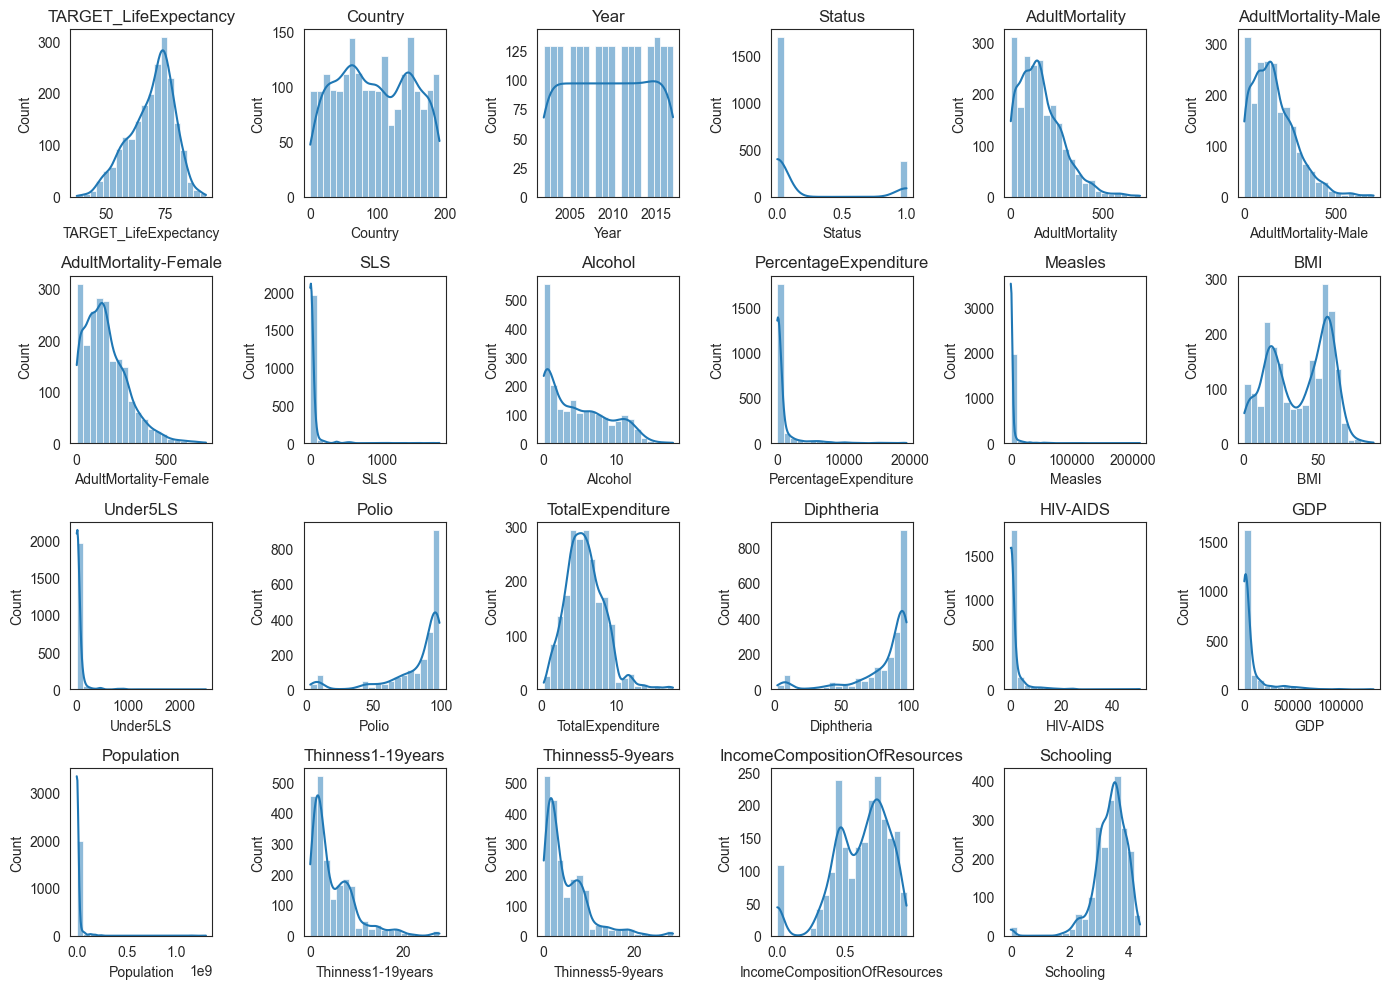

In [462]:


# Define the numerical and categorical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data.select_dtypes(include=['object']).columns

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(14, 10))
    sns.set_style("white")  # Set the background style to white
    for i, col in enumerate(train_data.columns):
        plt.subplot(4, 6, i + 1)
        sns.histplot(train_data[col], bins=20, kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()


# Observations

- Right Skew
    - AdultMortality
    - AdultMortality-Male
    - AdultMortality-Female
    - SLS
    - Alcohol
    - PercentageExpenditure
    - Measles
    - Under5LS
    - HIV-AIDS
    - GDP
    - Population
    - Thinness1-19years
    - Thinness5-9years
- Left Skew
    - Polio
    - Diphtheria
    - IncomeCompositionOfResources ***
    - Schooling


- Much more negative (0) values present in the status category than positive (1).
- Many variables show that they're skewed (both left and right) due to their distributions shown in the histograms because of this it is important that we apply normalization in the data transformation stage.



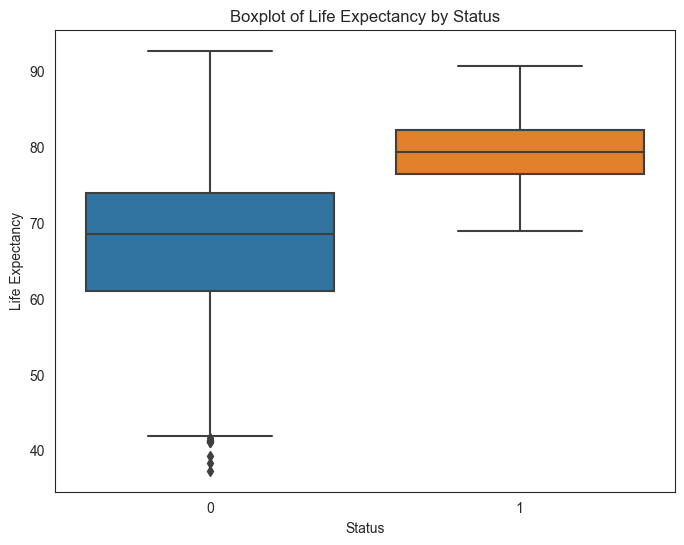

In [463]:
# Dual boxplot between 'TARGET_LifeExpectancy' and 'Status'.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='TARGET_LifeExpectancy', data=train_data)
plt.title('Boxplot of Life Expectancy by Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.show()


### Observations
- Positive status is more likely to have a higher Life Expectancy value. 
- Less Variation in Life expectancy in the positive '1' category.
- Outliers present in the negative '0' category.


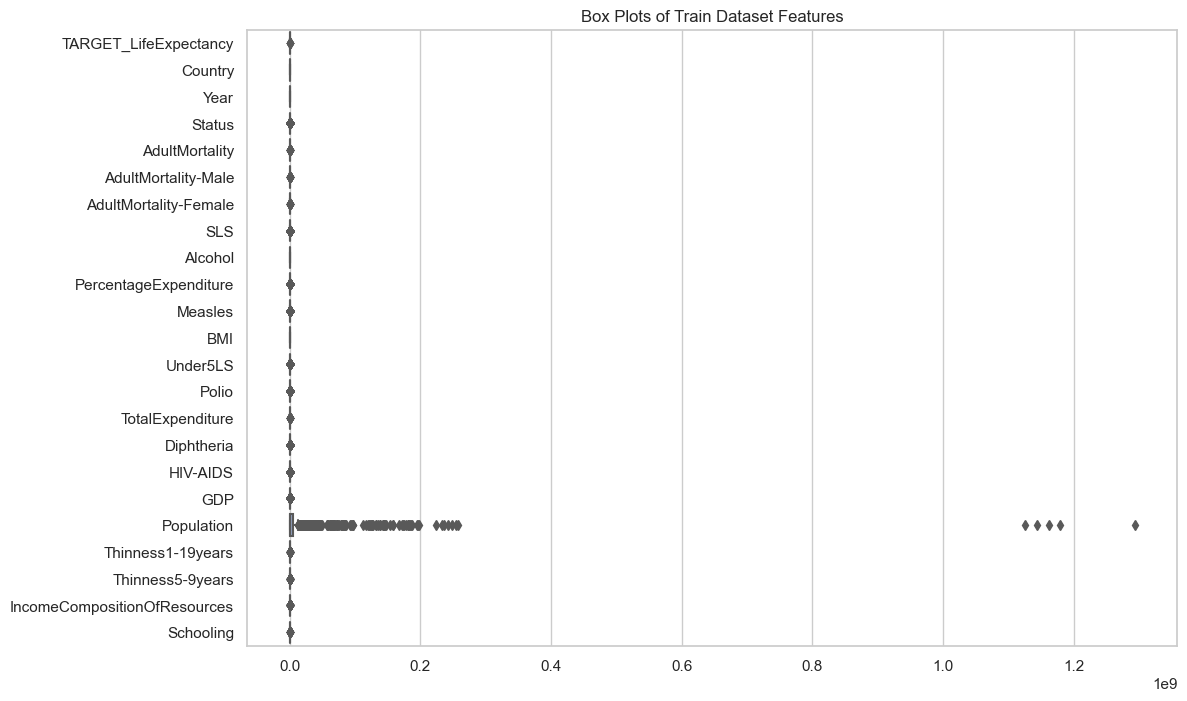

In [464]:
# Boxplots of all the variables showing presence of outliers in most variables. Especially Population. 
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.boxplot(data=train_data, orient="h", palette="Set2")
ax.set_title('Box Plots of Train Dataset Features')
plt.show()

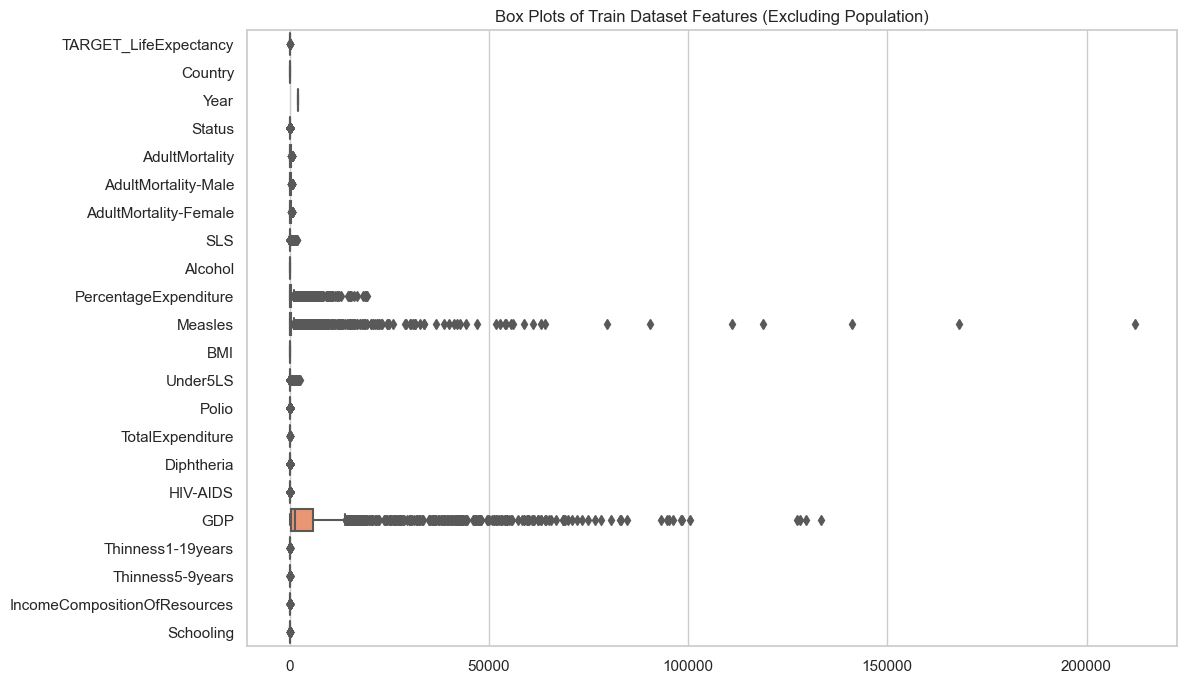

In [465]:


plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.boxplot(data=train_data.drop(columns=['Population']), orient="h", palette="Set2")
ax.set_title('Box Plots of Train Dataset Features (Excluding Population)')
plt.show()


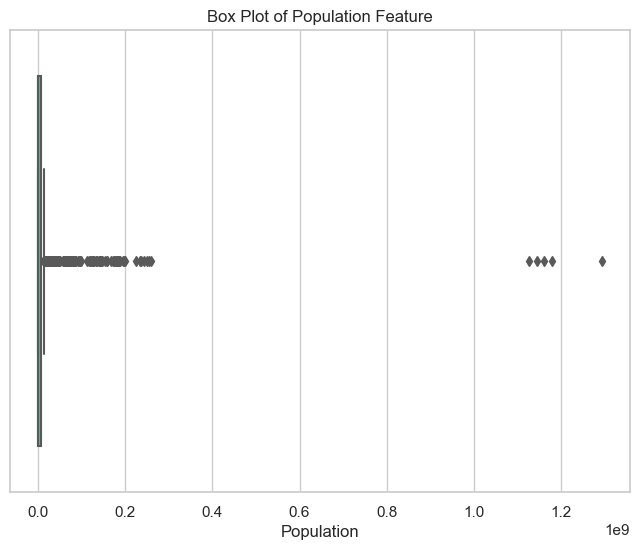

In [466]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.boxplot(x=train_data['Population'], palette="Set2")
ax.set_title('Box Plot of Population Feature')
plt.show()

### Boxplots 
- Boxplot: The scale of population values are much larger in comparison to the other variables.
- We can see many outliers present in the data across alot of the variables.




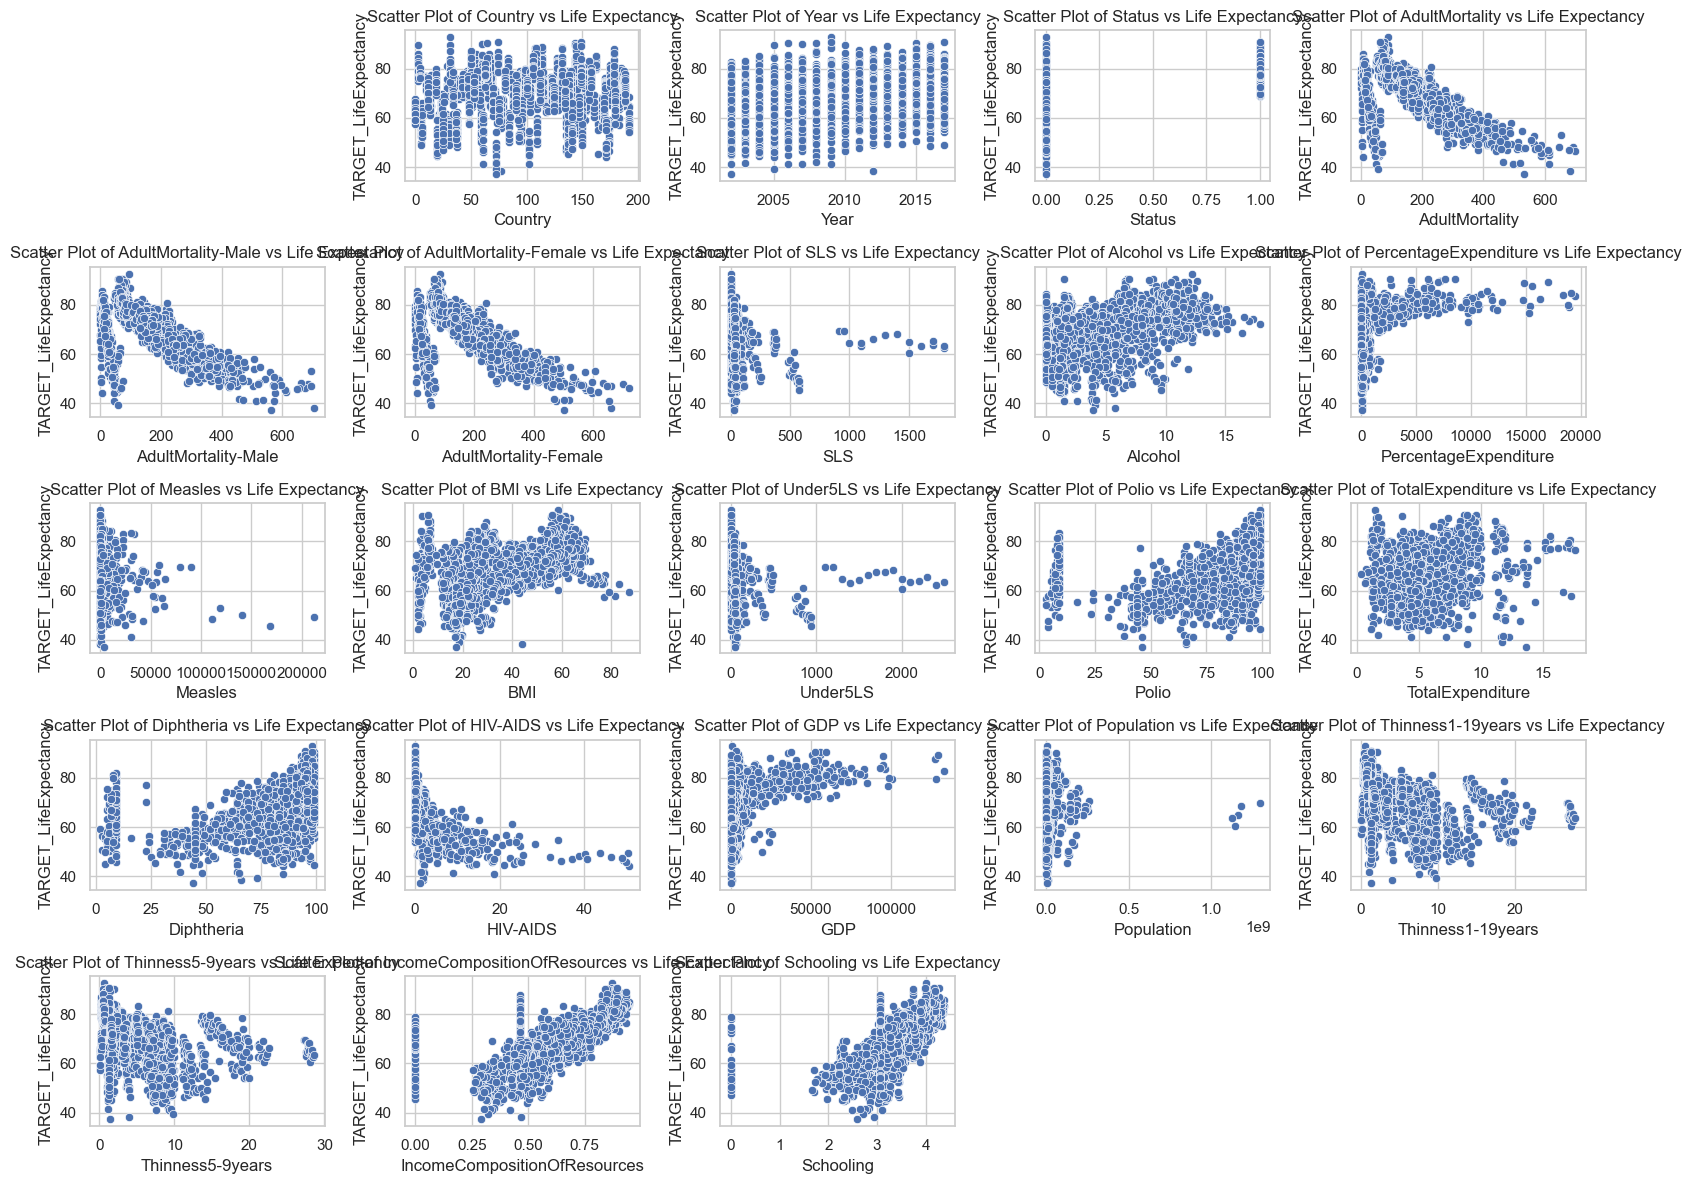

In [467]:
# Scatter plots of all variables against the target variable.

plt.figure(figsize=(16, 12))
for i, col in enumerate(train_data.columns):
    if col != 'TARGET_LifeExpectancy':  # Exclude target variable from scatter plots
        plt.subplot(5, 5, i + 1)
        sns.scatterplot(x=col, y='TARGET_LifeExpectancy', data=train_data)
        plt.title(f'Scatter Plot of {col} vs Life Expectancy')
plt.tight_layout()
plt.show()


# Observations
Linear relationships visible in many of the variables (Positive and Negative).
Most prominent include.
- AdultMortality
- IncomeCompositionOfResources
- Schooling
- Alcohol
### Outliers seem to be especially present in.
- SLS
- Under5LS
- Measles

#### Other Observations
- Worth experimenting how the removal of outliers would affect model performance.
- We can also observe that the Adult Mortality features (Both,Male,Female) show almost identical relationships with the target variable. This can introduce redundancy due to the high correlation between these features. This signifies that regularization will be important to apply to our model due to multicollinearity.
        

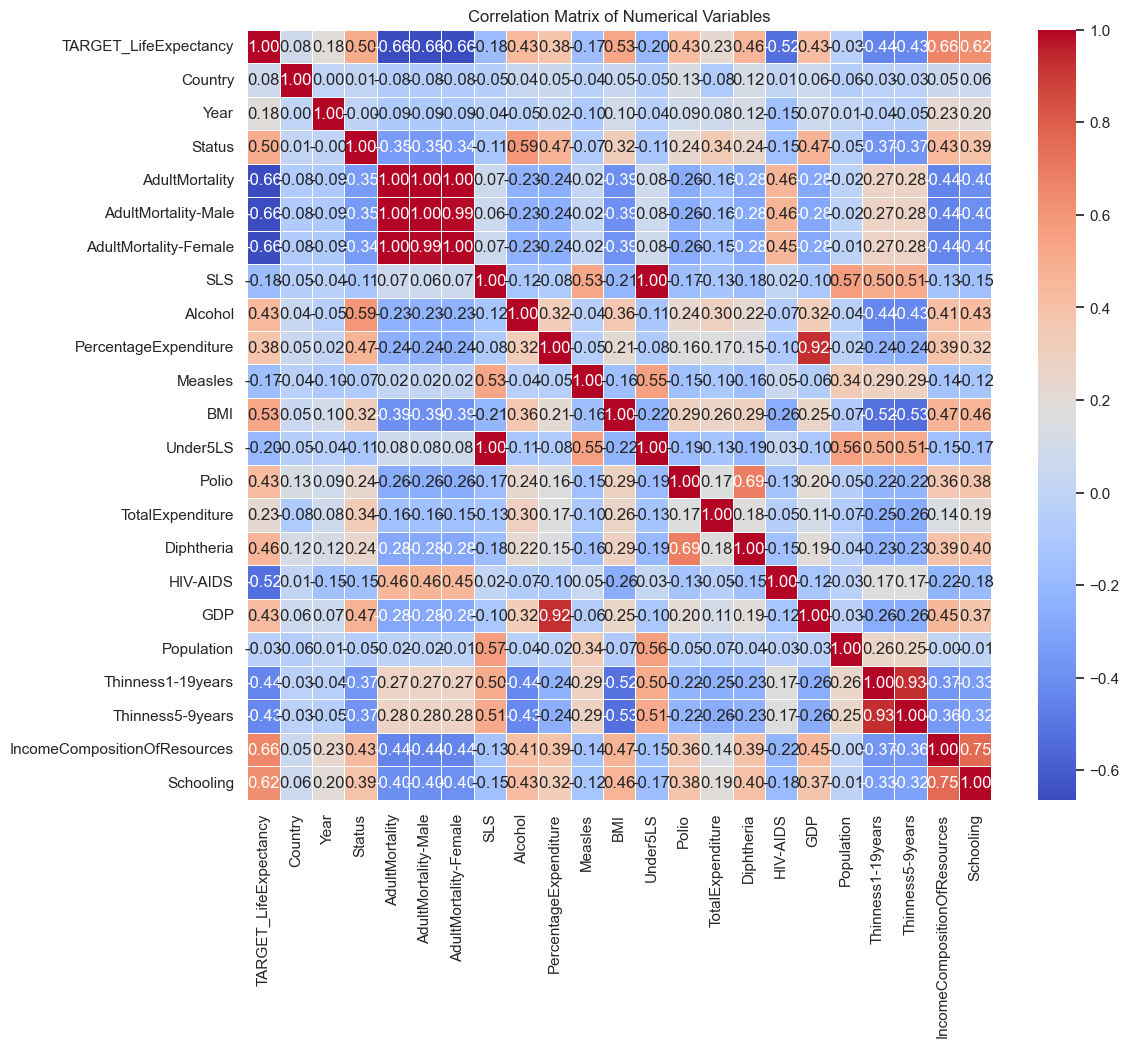

In [468]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### Observations


Correlation heatmap shows many variables with strong correlations (Positive or negative).


Mortality attributes and IncomeCompositionOfResources all share the highest correlation value of +-0.66.
Schooling comes close behind with a correlation value of 0.62.


Lowest correlations with the target variable are.
- Country 0.08
- Measles -0.17
- SLS and Year with +-0.18


There are highly correlated independent variables present. As we cannot perform feature selection it may add extra importance to regularization
to help deal with the redundancy of the high correlation.
The Lasso method may be very important here as it has the ability to shrink features coefficients to 0.





### Using histograms to check that the distribution between the train and test datasets are approximately the same.


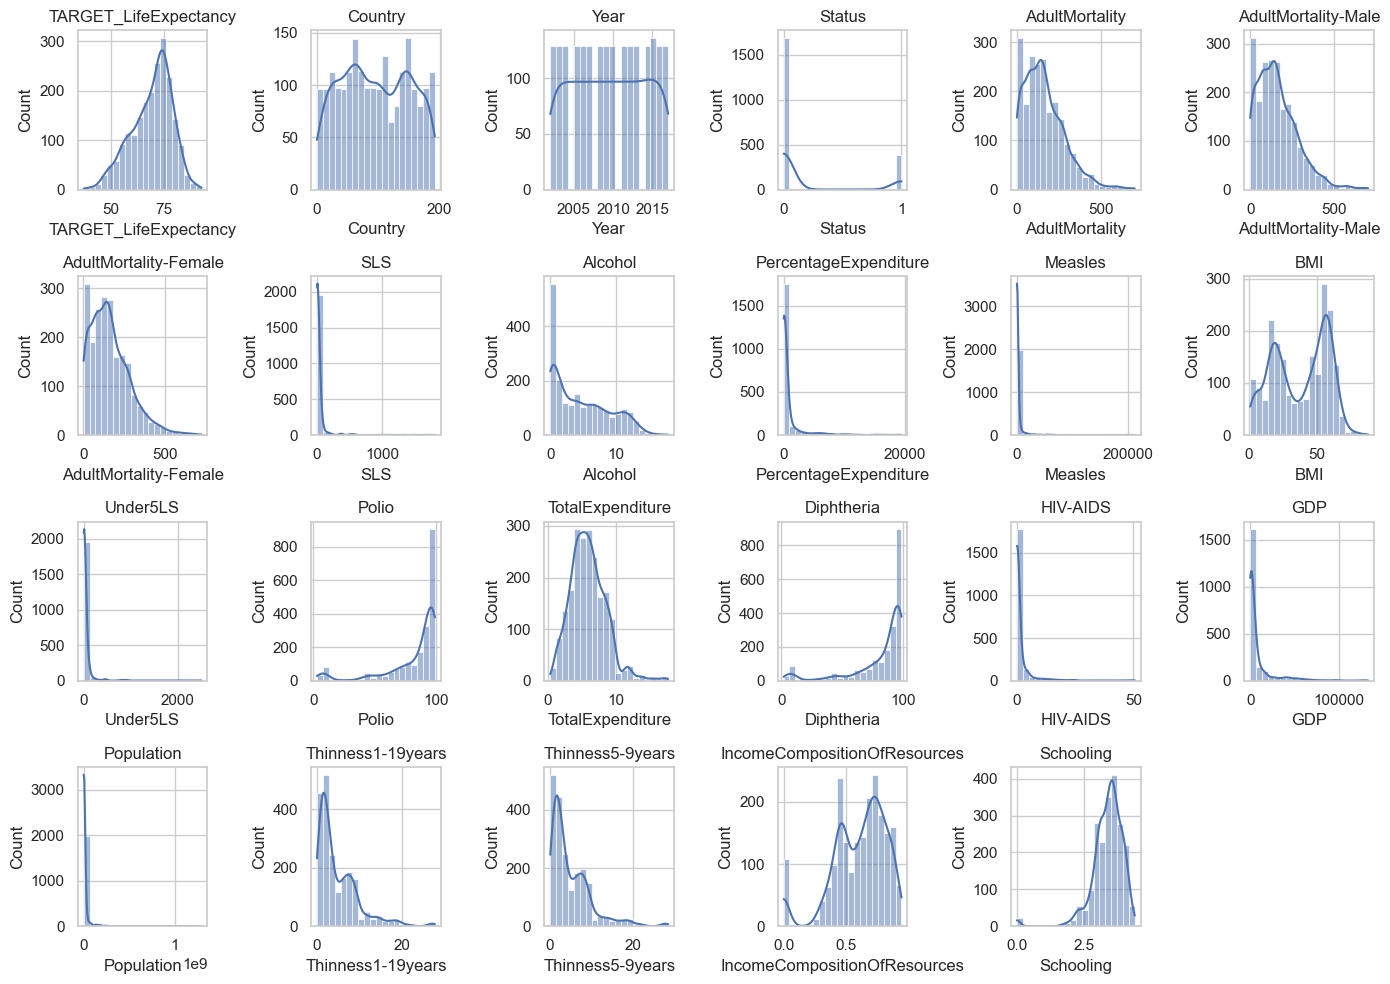

In [469]:


# Define the numerical and categorical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data.select_dtypes(include=['object']).columns

# Ignore warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Set the style to whitegrid and figure size
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 10))

    # Plot histograms for numerical features
    for i, col in enumerate(numerical_features):
        plt.subplot(4, 6, i + 1)
        sns.histplot(train_data[col], bins=20, kde=True)
        plt.title(col)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


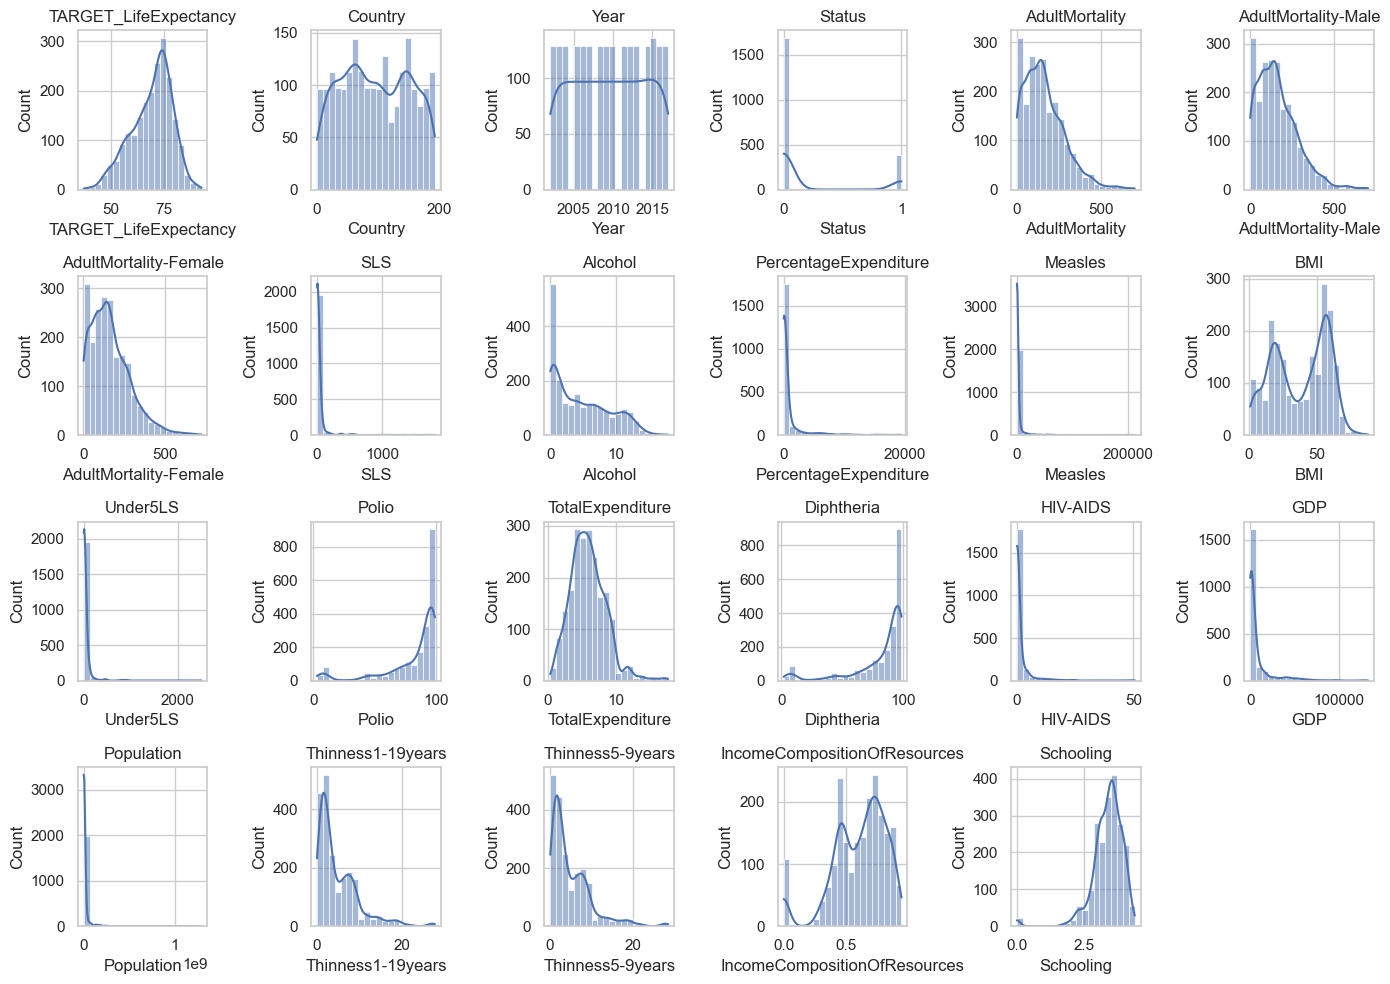

In [470]:
# Define the numerical and categorical features
numerical_features = test_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = test_data.select_dtypes(include=['object']).columns


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(14, 10))
    sns.set(style="whitegrid")
    for i, col in enumerate(train_data.columns):
        plt.subplot(4, 6, i + 1)
        sns.histplot(train_data[col], bins=20, kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()


# Observations
- The distributions look extremely similar.
- Close enough that the model should be able to generalize and be useful for predctions on the test data.
- So long as there is a 1 to 1 with the transformations made on the train data to the test data!



### Data preperation and aplication of model Techniques

- Multivariate Linear Regression chosen as the baseline Model as the data set contains multiple features. From the Scatter plot EDA we also see multiple variables that have linear relationships showing.
#### Hypothesis Equation for Multivariate Linear Regression

Multivariate linear regression hypothesis.

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $$


The hypothesis equation calculates the predicted value theta(x) by taking a weighted sum of the features x_1, x_2, ..., x_n with their respective coefficients theta_1, theta_2, ..., theta_n, and adding the bias term theta_0.


The Mean Squared Error (MSE) is calculated as:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$


## R-squared (Coefficient of Determination)

The R-squared (Coefficient of Determination) is a statistical measure that represents the proportion of variance in the dependent variable (target) that is predictable from the independent variables (features) in the regression model. It is calculated as:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

### Why are these good evaluation metrics?

1. **Mean Squared Error (MSE):**
   - MSE provides a measure of how close the predicted values are to the actual values. Lower MSE indicates better model performance in terms of prediction accuracy.
   - Squaring the errors in MSE emphasizes larger errors, making it more sensitive to outliers and deviations (Which EDA has shown is prevalent in the data).

2. **R-squared (Coefficient of Determination):**
   - R-squared measures the goodness of fit of the regression model. A higher R-squared value indicates that more variance in the target variable is explained by the features.
   - It helps assess the proportion of variability in the target variable that can be attributed to the model's predictions, providing insights into model effectiveness.


In [471]:

# Reading the train and test datasets into the notebook
train_data = pd.read_csv(r"C:\Users\User\Desktop\Computational Machine Learning\Assignment 1\dataset\train.csv")
test_data = pd.read_csv(r"C:\Users\User\Desktop\Computational Machine Learning\Assignment 1\dataset\test.csv")


train_data = train_data.drop(columns=['ID'])

In [472]:




# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('TARGET_LifeExpectancy', axis=1),
                                                  train_data['TARGET_LifeExpectancy'],
                                                  test_size=0.2,
                                                  random_state=42)


In [473]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 23.759930462924046
R-squared Score: 0.7124221366700942


- From our baseline model we see that Mean Square Error is 23.7599
- R-squared Score: 0.7124221 

- This indicates that the model's predictions have an average squared deviation of approximately 23.76 from the actual values, and it explains approximately 71.24% of the variance in the target variable.

### Outlier removal
- As seen in the code below, if we were to remove all the outliers based on tukey's rule we would lose 1427 values which we can not afford to lose as the data set is small to begin with. We would lose too much information which would negatively affect the output and training of our model.

In [474]:




# Select numeric columns only for outlier removal
numeric_columns = train_data.select_dtypes(include=['number']).columns

# Calculate quartiles and IQR for each numeric column
Q1 = train_data[numeric_columns].quantile(0.25)
Q3 = train_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on Tukey's rule
outliers_mask = ((train_data[numeric_columns] < (Q1 - 1.5 * IQR)) | (train_data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Count the number of rows that would be removed
num_rows_removed = outliers_mask.sum()

print("Number of rows that would be removed as outliers:", num_rows_removed)


Number of rows that would be removed as outliers: 1427


### Scaling the data
- We choose to perform MinMaxScaler transformation on a data set as we saw from EDA that there is a large variation in the scale of the feature values. Normalization of Features: Min-max scaling transforms the features to a common scale, typically between 0 and 1. This normalization prevents features with larger ranges from dominating the model and helps in comparing the importance of different features based on their magnitudes.


- Improves Convergence: Min-max scaling can improve the convergence speed of optimization algorithms used in regression models. Algorithms like gradient descent converge faster when features are on a similar scale, leading to quicker model training.


- Reduces Sensitivity to Outliers: Min-max scaling compresses the range of features, making the model less sensitive to outliers compared to models trained on unscaled data. Outliers have less impact on the model's decision boundaries and can lead to more stable predictions.


- Enhances Regularization: In regression models with regularization techniques like Ridge or Lasso regression, min-max scaling can improve the effectiveness of regularization by ensuring that all features are penalized equally, regardless of their scales.


In [475]:


# Select numeric columns for MinMax scaling in the train set
numeric_columns_train = X_train.select_dtypes(include=['number']).columns
numeric_columns_val = X_val.select_dtypes(include=['number']).columns

# Remove the target variable column name from numeric_columns
numeric_columns_train = numeric_columns_train.drop('TARGET_LifeExpectancy', errors='ignore')
numeric_columns_val = numeric_columns_val.drop('TARGET_LifeExpectancy', errors='ignore')

# Apply MinMax scaling to the selected columns for the train set
minmax_scaler_train = MinMaxScaler()
X_train_scaled = pd.DataFrame(minmax_scaler_train.fit_transform(X_train[numeric_columns_train]), columns=numeric_columns_train)

# Apply MinMax scaling to the selected columns for the validation set
X_val_scaled = pd.DataFrame(minmax_scaler_train.transform(X_val[numeric_columns_val]), columns=numeric_columns_val)

# Concatenate the target variable back to the scaled datasets
X_train_scaled['TARGET_LifeExpectancy'] = y_train.values
X_val_scaled['TARGET_LifeExpectancy'] = y_val.values

# Display the scaled datasets with the target variable added back
print("Train Data (After MinMax Scaling with Target Variable):")
print(X_train_scaled.head())

print("Validation Data (After MinMax Scaling with Target Variable):")
print(X_val_scaled.head())


Train Data (After MinMax Scaling with Target Variable):
    Country      Year  Status  AdultMortality  AdultMortality-Male   
0  0.765625  0.266667     0.0        0.339542             0.346591  \
1  0.781250  0.400000     0.0        0.468481             0.440341   
2  0.250000  0.800000     0.0        0.038682             0.036932   
3  0.916667  0.000000     0.0        0.352436             0.360795   
4  0.973958  0.800000     0.0        0.011461             0.011364   

   AdultMortality-Female       SLS   Alcohol  PercentageExpenditure   Measles   
0               0.319444  0.003333  0.159574               0.009554  0.000005  \
1               0.477778  0.012222  0.384658               0.004028  0.002328   
2               0.038889  0.005000  0.000000               0.000000  0.000151   
3               0.330556  0.000556  0.726204               0.001245  0.000099   
4               0.011111  0.004444  0.004479               0.010081  0.001386   

   ...  TotalExpenditure  Diphtheria

In [476]:
# After MinMax Scaling 
X_train = X_train_scaled.drop('TARGET_LifeExpectancy', axis=1)  # Features for training set
y_train = X_train_scaled['TARGET_LifeExpectancy']  # Target variable for training set

X_val = X_val_scaled.drop('TARGET_LifeExpectancy', axis=1)  # Features for validation set
y_val = X_val_scaled['TARGET_LifeExpectancy']  # Target variable for validation set

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
mse1 = mean_squared_error(y_val, y_pred)
r21 = r2_score(y_val, y_pred)

print("Evaluation Metrics: Baseline")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print()
print("Evaluation Metrics: After MinMaxScaling")
print("Mean Squared Error:", mse1)
print("R-squared Score:", r21)


Evaluation Metrics: Baseline
Mean Squared Error: 23.759930462924046
R-squared Score: 0.7124221366700942

Evaluation Metrics: After MinMaxScaling
Mean Squared Error: 23.759930463344535
R-squared Score: 0.7124221366650049


- Mean Squared Error decreases significantly, from 23.76 to 0.21, after MinMaxScaling.
R-squared Score improves slightly, from 0.71 to 0.77, indicating better model performance in capturing the variance in the target variable after scaling.

### Min Max Scaling greatly reduced the MeanSquared Error Value R^2 saw improvement.
- Overall, the metrics show that MinMaxScaling has resulted in a significant improvement in model performance, as evidenced by the decrease in MSE and the increase in R-squared score. This indicates that scaling the features has positively impacted the model's predictive accuracy and explanatory power.

In [477]:


# Select numeric columns for Yeo-Johnson transformation in the train set
numeric_columns_train = X_train_scaled.select_dtypes(include=['number']).columns
numeric_columns_val = X_val_scaled.select_dtypes(include=['number']).columns

# Remove the target variable column name from numeric_columns
numeric_columns_train = numeric_columns_train.drop('TARGET_LifeExpectancy', errors='ignore')
numeric_columns_val = numeric_columns_val.drop('TARGET_LifeExpectancy', errors='ignore')

# Apply Yeo-Johnson transformation to the MinMax scaled data for both train and validation sets
power_transformer = PowerTransformer(method='yeo-johnson')
X_train_scaled_normalized = power_transformer.fit_transform(X_train_scaled[numeric_columns_train])
X_val_scaled_normalized = power_transformer.transform(X_val_scaled[numeric_columns_train])

# Concatenate the target variable back to the transformed datasets
X_train_scaled_normalized = pd.DataFrame(X_train_scaled_normalized, columns=numeric_columns_train)
X_val_scaled_normalized = pd.DataFrame(X_val_scaled_normalized, columns=numeric_columns_val)
X_train_scaled_normalized['TARGET_LifeExpectancy'] = y_train.values
X_val_scaled_normalized['TARGET_LifeExpectancy'] = y_val.values

# Display the transformed datasets with the target variable added back
print("Train Data (After MinMax Scaling and Yeo-Johnson Transformation with Target Variable):")
print(X_train_scaled_normalized.head())


Train Data (After MinMax Scaling and Yeo-Johnson Transformation with Target Variable):
    Country      Year    Status  AdultMortality  AdultMortality-Male   
0  0.947441 -0.755754 -0.490356        0.800452             0.848333  \
1  0.998475 -0.310452 -0.490356        1.342220             1.249560   
2 -0.853170  0.976163 -0.490356       -1.359508            -1.373925   
3  1.433598 -1.677613 -0.490356        0.861809             0.914664   
4  1.614010  0.976163 -0.490356       -1.656941            -1.656856   

   AdultMortality-Female       SLS   Alcohol  PercentageExpenditure   Measles   
0               0.752164 -0.334325 -0.299377              -0.184939 -0.557753  \
1               1.429279  0.570888  0.677235              -0.508927  0.026786   
2              -1.342944 -0.137731 -1.314298              -0.772723 -0.517458   
3               0.808049 -0.694508  1.605898              -0.688549 -0.531698   
4              -1.654853 -0.201726 -1.280593              -0.156106 -0.1963

In [478]:
X_train_scaled_normalized.head()

,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,...,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling,TARGET_LifeExpectancy
0,0.947441,-0.755754,-0.490356,0.800452,0.848333,0.752164,-0.334325,-0.299377,-0.184939,-0.557753,...,-0.569727,0.837919,-0.620894,-0.413828,-0.595612,-0.068738,-0.081100,-2.110513,-0.510750,61.9
1,0.998475,-0.310452,-0.490356,1.342220,1.249560,1.429279,0.570888,0.677235,-0.508927,0.026786,...,-2.254968,1.095636,2.194655,-0.821259,-0.682296,0.830289,0.811637,-1.077589,-0.789490,57.4
2,-0.853170,0.976163,-0.490356,-1.359508,-1.373925,-1.342944,-0.137731,-1.314298,-0.772723,-0.517458,...,-1.693592,-0.766163,-0.306357,-0.810557,-0.674280,1.205144,1.203587,-0.453776,-0.539258,69.3
3,1.433598,-1.677613,-0.490356,0.861809,0.914664,0.808049,-0.694508,1.605898,-0.688549,-0.531698,...,0.199849,1.095636,-0.620894,-0.474653,-0.479917,-0.331581,-0.300213,0.166907,0.345340,70.1
4,1.614010,0.976163,-0.490356,-1.656941,-1.656856,-1.654853,-0.201726,-1.280593,-0.156106,-0.196381,...,-0.776336,0.964350,-0.620894,-0.075427,-0.674280,0.959307,0.923691,1.052426,0.815702,74.3


In [479]:
# Define X and y
X = X_train_scaled_normalized.drop('TARGET_LifeExpectancy', axis=1)  # Features
y = X_train_scaled_normalized['TARGET_LifeExpectancy']  # Target variable

# Initialize and train the Linear Regression model
model_yeojohnson = LinearRegression()
model_yeojohnson.fit(X, y)

# Make predictions on the validation set
y_pred_yeojohnson = model_yeojohnson.predict(X_val_scaled_normalized.drop('TARGET_LifeExpectancy', axis=1))

# Evaluate the model after Yeo-Johnson normalization
mse_yeojohnson = mean_squared_error(y_val, y_pred_yeojohnson)
r2_yeojohnson = r2_score(y_val, y_pred_yeojohnson)

# Print the evaluation metrics
print("Evaluation Metrics: Baseline")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print()
print("Evaluation Metrics: After MinMaxScaling")
print("Mean Squared Error:", mse1)
print("R-squared Score:", r21)
print()
print("Evaluation Metrics: After Yeo-Johnson Normalization")
print("Mean Squared Error:", mse_yeojohnson)
print("R-squared Score:", r2_yeojohnson)


Evaluation Metrics: Baseline
Mean Squared Error: 23.759930462924046
R-squared Score: 0.7124221366700942

Evaluation Metrics: After MinMaxScaling
Mean Squared Error: 23.759930463344535
R-squared Score: 0.7124221366650049

Evaluation Metrics: After Yeo-Johnson Normalization
Mean Squared Error: 18.22935779350838
R-squared Score: 0.7793613170579815


In [480]:
# After the implementation of yeo-johnson to help normalise the skewed data we observed in the histograms during the EDA. 
# We observe that the we lose performance on the Mean Squared Error value. However we see an improvement in the R-squared 
# value.

In [481]:
# Initialize and train the Ridge Regularization model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled_normalized.drop('TARGET_LifeExpectancy', axis=1), y_train)

# Make predictions on the validation set
y_pred_ridge = ridge_model.predict(X_val_scaled_normalized.drop('TARGET_LifeExpectancy', axis=1))

# Evaluate the Ridge Regularization model
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)

# Print the evaluation metrics
print("Evaluation Metrics: Baseline")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print()
print("Evaluation Metrics: After MinMaxScaling")
print("Mean Squared Error:", mse1)
print("R-squared Score:", r21)
print()
print("Evaluation Metrics: After Yeo-Johnson Normalization")
print("Mean Squared Error:", mse_yeojohnson)
print("R-squared Score:", r2_yeojohnson)
print()
print("Evaluation Metrics: Ridge Regression")
print("Mean Squared Error:", mse_ridge)
print("R-squared Score:", r2_ridge)



Evaluation Metrics: Baseline
Mean Squared Error: 23.759930462924046
R-squared Score: 0.7124221366700942

Evaluation Metrics: After MinMaxScaling
Mean Squared Error: 23.759930463344535
R-squared Score: 0.7124221366650049

Evaluation Metrics: After Yeo-Johnson Normalization
Mean Squared Error: 18.22935779350838
R-squared Score: 0.7793613170579815

Evaluation Metrics: Ridge Regression
Mean Squared Error: 18.43229611838999
R-squared Score: 0.776905056929263


In [482]:

# Initialize and train the Lasso Regularization model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled_normalized.drop('TARGET_LifeExpectancy', axis=1), y_train)

# Make predictions on the validation set
y_pred_lasso = lasso_model.predict(X_val_scaled_normalized.drop('TARGET_LifeExpectancy', axis=1))

# Evaluate the Lasso Regularization model
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)




print("Evaluation Metrics: Baseline")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print()
print("Evaluation Metrics: After MinMaxScaling")
print("Mean Squared Error:", mse1)
print("R-squared Score:", r21)
print()
print("Evaluation Metrics: After Yeo-Johnson Normalization")
print("Mean Squared Error:", mse_yeojohnson)
print("R-squared Score:", r2_yeojohnson)
print()
print("Evaluation Metrics: Ridge Regularization")
print("Mean Squared Error:", mse_ridge)
print("R-squared Score:", r2_ridge)
print()
print("Evaluation Metrics: Lasso Regularization")
print("Mean Squared Error:", mse_lasso)
print("R-squared Score:", r2_lasso)


Evaluation Metrics: Baseline
Mean Squared Error: 23.759930462924046
R-squared Score: 0.7124221366700942

Evaluation Metrics: After MinMaxScaling
Mean Squared Error: 23.759930463344535
R-squared Score: 0.7124221366650049

Evaluation Metrics: After Yeo-Johnson Normalization
Mean Squared Error: 18.22935779350838
R-squared Score: 0.7793613170579815

Evaluation Metrics: Ridge Regularization
Mean Squared Error: 18.43229611838999
R-squared Score: 0.776905056929263

Evaluation Metrics: Lasso Regularization
Mean Squared Error: 18.614071761273387
R-squared Score: 0.7747049389168219


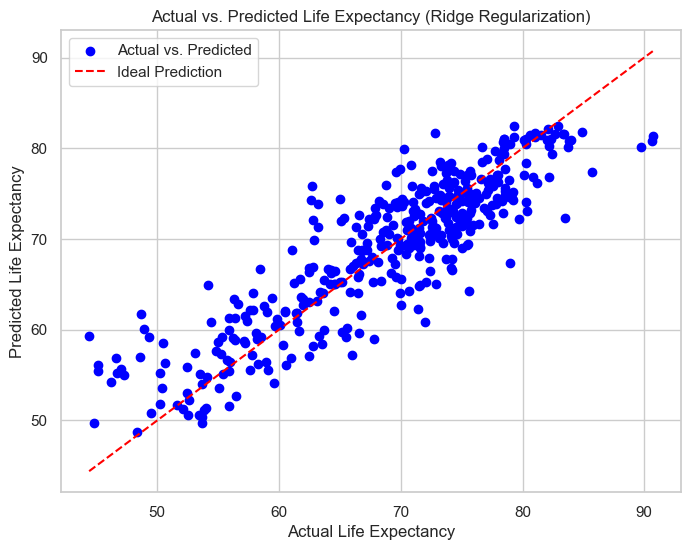

In [483]:


# Plotting the actual vs. predicted values for Ridge Regularization
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_ridge, color='blue', label='Actual vs. Predicted')

# Adding labels and title
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs. Predicted Life Expectancy (Ridge Regularization)')

# Adding a diagonal line for reference (ideal prediction)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='Ideal Prediction')

# Adding legend
plt.legend()

# Show plot
plt.show()


From the graph we see that we might have reached the end of improving our models performance through linear models. Due to nonlinear relationships in the data. We move on to try polynomial regression to try and improve the hypothesis' fit.

## Hypothesis Equation for Polynomial Regression

In polynomial regression, the hypothesis equation for predicting the target variable \( y \) based on a polynomial function of the input feature \( x \) can be written as:

$$ h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + ... + \theta_n x^n $$

In polynomial regression, the model can capture nonlinear relationships between the input feature and the target variable by including higher-order terms in the hypothesis equation.


In [484]:




# Transform features using polynomial features
poly = PolynomialFeatures(degree=2)  # Use the same degree as in the original model
X_train_poly = poly.fit_transform(X_train_scaled_normalized.drop('TARGET_LifeExpectancy', axis=1))
X_val_poly = poly.transform(X_val_scaled_normalized.drop('TARGET_LifeExpectancy', axis=1))

# Initialize and train the Polynomial Regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Make predictions on the validation set
y_pred_poly = model_poly.predict(X_val_poly)

# Evaluate the Polynomial Regression model
mse_poly = mean_squared_error(y_val, y_pred_poly)
r2_poly = r2_score(y_val, y_pred_poly)



print("Evaluation Metrics: Baseline")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print()
print("Evaluation Metrics: After MinMaxScaling")
print("Mean Squared Error:", mse1)
print("R-squared Score:", r21)
print()
print("Evaluation Metrics: Ridge Regularization")
print("Mean Squared Error:", mse_ridge)
print("R-squared Score:", r2_ridge)
print()
print("Evaluation Metrics: Polynomial Regression")
print("Mean Squared Error:", mse_poly)
print("R-squared Score:", r2_poly)


Evaluation Metrics: Baseline
Mean Squared Error: 23.759930462924046
R-squared Score: 0.7124221366700942

Evaluation Metrics: After MinMaxScaling
Mean Squared Error: 23.759930463344535
R-squared Score: 0.7124221366650049

Evaluation Metrics: Ridge Regularization
Mean Squared Error: 18.43229611838999
R-squared Score: 0.776905056929263

Evaluation Metrics: Polynomial Regression
Mean Squared Error: 10.984260605226082
R-squared Score: 0.8670522121249917


We see from the polynomial regression that the first test gives a significant boost to Mean Squared Error and R-squared values, breaking the 0.8 mark. To further improve the model's performance and address potential overfitting, we can introduce Ridge and Lasso regularization techniques. These techniques help by controlling the model's complexity and reducing the impact of multicollinearity, which can lead to more robust and generalizable predictions. Ridge regularization (L2) encourages smaller coefficients, while Lasso regularization (L1) performs feature selection by shrinking less important features' coefficients to zero. By incorporating these regularization techniques, we aim to enhance the model's ability to capture the underlying patterns in the data while avoiding overfitting and improving its interpretability. Due to the high dimensionality of this dataset Lasso regularization may serve us as it can reduce the impact of the features with low correlation to the target variable.

In [485]:



# Transform features using polynomial features for Polynomial Regression
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train_scaled_normalized.drop('TARGET_LifeExpectancy', axis=1))
X_val_poly = poly.transform(X_val_scaled_normalized.drop('TARGET_LifeExpectancy', axis=1))

# Initialize and train the Polynomial Regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Make predictions on the validation set using Polynomial Regression
y_pred_poly = model_poly.predict(X_val_poly)

# Evaluate the Polynomial Regression model
mse_poly = mean_squared_error(y_val, y_pred_poly)
r2_poly = r2_score(y_val, y_pred_poly)

# Apply Ridge Regression on the Polynomial Regularization model
alpha = 0.1
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_poly, y_train)

# Make predictions on the validation set using Ridge Regularization
y_pred_ridge_poly = ridge_model.predict(X_val_poly)

# Evaluate the Ridge Regression model on Polynomial Regression
mse_ridge_poly = mean_squared_error(y_val, y_pred_ridge_poly)
r2_ridge_poly = r2_score(y_val, y_pred_ridge_poly)




print("Evaluation Metrics: Baseline")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print()
print("Evaluation Metrics: After MinMaxScaling")
print("Mean Squared Error:", mse1)
print("R-squared Score:", r21)
print()
print("Evaluation Metrics: Ridge Regularization")
print("Mean Squared Error:", mse_ridge)
print("R-squared Score:", r2_ridge)
print()
print("Evaluation Metrics: Polynomial Regression")
print("Mean Squared Error:", mse_poly)
print("R-squared Score:", r2_poly)
print()
print("Evaluation Metrics: Ridge Regularization on Polynomial Regression")
print("Mean Squared Error:", mse_ridge_poly)
print("R-squared Score:", r2_ridge_poly)


Evaluation Metrics: Baseline
Mean Squared Error: 23.759930462924046
R-squared Score: 0.7124221366700942

Evaluation Metrics: After MinMaxScaling
Mean Squared Error: 23.759930463344535
R-squared Score: 0.7124221366650049

Evaluation Metrics: Ridge Regularization
Mean Squared Error: 18.43229611838999
R-squared Score: 0.776905056929263

Evaluation Metrics: Polynomial Regression
Mean Squared Error: 10.984260605226082
R-squared Score: 0.8670522121249917

Evaluation Metrics: Ridge Regularization on Polynomial Regression
Mean Squared Error: 10.473621122308382
R-squared Score: 0.8732327273271935


After the first implementation of the ridge regularization we see more imporvements in the model.

In [486]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso Regression model
alpha_lasso = 0.1  # Regularization strength for Lasso, adjust as needed
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_train_poly, y_train)

# Make predictions on the validation set using Lasso Regularization
y_pred_lasso_poly = lasso_model.predict(X_val_poly)

# Evaluate the Lasso Regularization model
mse_lasso_poly = mean_squared_error(y_val, y_pred_lasso_poly)
r2_lasso_poly = r2_score(y_val, y_pred_lasso_poly)

print("Evaluation Metrics: Baseline")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print()
print("Evaluation Metrics: After MinMaxScaling")
print("Mean Squared Error:", mse1)
print("R-squared Score:", r21)
print()
print("Evaluation Metrics: Ridge Regularization")
print("Mean Squared Error:", mse_ridge)
print("R-squared Score:", r2_ridge)
print()
print("Evaluation Metrics: Polynomial Regression")
print("Mean Squared Error:", mse_poly)
print("R-squared Score:", r2_poly)
print()
print("Evaluation Metrics: Ridge Regularization on Polynomial Regression")
print("Mean Squared Error:", mse_ridge_poly)
print("R-squared Score:", r2_ridge_poly)
print()
print("Evaluation Metrics: Lasso Regularization on Polynomial Regression")
print("Mean Squared Error:", mse_lasso_poly)
print("R-squared Score:", r2_lasso_poly)


Evaluation Metrics: Baseline
Mean Squared Error: 23.759930462924046
R-squared Score: 0.7124221366700942

Evaluation Metrics: After MinMaxScaling
Mean Squared Error: 23.759930463344535
R-squared Score: 0.7124221366650049

Evaluation Metrics: Ridge Regularization
Mean Squared Error: 18.43229611838999
R-squared Score: 0.776905056929263

Evaluation Metrics: Polynomial Regression
Mean Squared Error: 10.984260605226082
R-squared Score: 0.8670522121249917

Evaluation Metrics: Ridge Regularization on Polynomial Regression
Mean Squared Error: 10.473621122308382
R-squared Score: 0.8732327273271935

Evaluation Metrics: Lasso Regularization on Polynomial Regression
Mean Squared Error: 11.847339745879944
R-squared Score: 0.8566059502749769


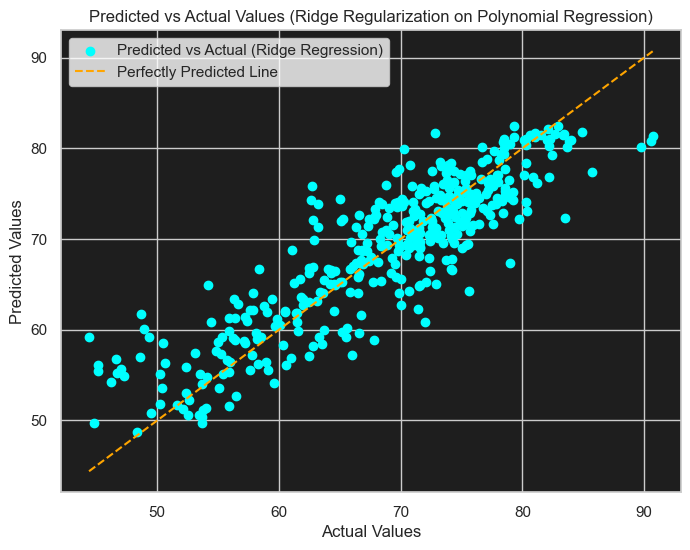

In [487]:
import matplotlib.pyplot as plt
import seaborn as sns




# Plot predicted vs actual values for Ridge Regularization on Polynomial Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_ridge, color='cyan', label='Predicted vs Actual (Ridge Regression)')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='orange', label='Perfectly Predicted Line')
plt.title('Predicted vs Actual Values (Ridge Regularization on Polynomial Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('#1E1E1E')  
plt.show()


### Hyperparameter tuning and Cross Validation.
- We now know how two well performing models it is time to tune the hyperparameters for the L1 and L2 regularization techniques.
  Along with this we will perform 5 Cross Fold validation to improve how the algorithms generalize.


- Hyperparameter tuning allows us to systematically explore different configurations of a model, such as varying the regularization strength or adjusting the learning rate. By doing so, we can identify the optimal combination of hyperparameters that yields the best performance on our dataset. The learning rate for models like polynomial regression does not need to be tuned in scikit-learn because these algorithms use closed-form solutions rather than iterative optimization. Instead, the regularization strength (alpha) needs to be tuned to find the optimal trade-off between bias and variance in the model.


- Cross-validation with 5 folds (CV 5) is an effective technique for evaluating machine learning models due to its balance between computational efficiency and robustness. By splitting the data into 5 subsets and using each as a validation set once while training on the remaining data, CV 5 ensures a fair evaluation across multiple iterations. This approach reduces variance in the evaluation results compared to a single train-test split, providing a more reliable estimate of the model's true performance. CV 5 also enhances generalization by testing the model on different data subsets, mitigating the risk of overfitting to a specific train-test split and offering insights into how well the model can perform on unseen data. Moreover, CV 5 is commonly employed for hyperparameter tuning, allowing for the testing of various model configurations across multiple folds and aiding in the selection of the best-performing model with optimal hyperparameters.




In [488]:


# Load the dataset
train_data = pd.read_csv(r"C:\Users\User\Desktop\Computational Machine Learning\Assignment 1\dataset\train.csv")

# Drop the target variable and any other unnecessary columns
X = train_data.drop(columns=['ID', 'TARGET_LifeExpectancy'])
y = train_data['TARGET_LifeExpectancy']

# Define the range of alpha values to test
alphas = [0.001, 0.01, 0.1, 0.3, 0.5, 1.0, 3.0, 5.0, 7, 10, 50, 100, 200, 300]

# Initialize MinMaxScaler and PowerTransformer for feature transformation
minmax_scaler = MinMaxScaler()
power_transformer = PowerTransformer(method='yeo-johnson')

# Define the number of folds for cross-validation
n_splits = 5
kfold = KFold(n_splits=n_splits)

# Initialize lists to store average scores for each alpha
avg_mse_scores = []
avg_r2_scores = []

# Loop over each alpha value
for alpha in alphas:
    # Initialize lists to store scores for each fold
    mse_scores = []
    r2_scores = []

    # Loop over each fold
    for train_index, val_index in kfold.split(X):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

        # Apply preprocessing to the training data
        X_train_fold_preprocessed = minmax_scaler.fit_transform(X_train_fold)
        X_train_fold_preprocessed = power_transformer.fit_transform(X_train_fold_preprocessed)

        # Apply preprocessing to the validation data
        X_val_fold_preprocessed = minmax_scaler.transform(X_val_fold)
        X_val_fold_preprocessed = power_transformer.transform(X_val_fold_preprocessed)

        # Transform features using polynomial features for Polynomial Regression
        poly = PolynomialFeatures(degree=2)
        X_train_fold_poly = poly.fit_transform(X_train_fold_preprocessed)
        X_val_fold_poly = poly.transform(X_val_fold_preprocessed)

        # Initialize Ridge Regression with current alpha
        ridge = Ridge(alpha=alpha)

        # Fit Ridge Regression on the training data
        ridge.fit(X_train_fold_poly, y_train_fold)

        # Make predictions on the validation set
        y_pred_val = ridge.predict(X_val_fold_poly)

        # Calculate mean squared error and R-squared score for the fold
        mse = mean_squared_error(y_val_fold, y_pred_val)
        r2 = r2_score(y_val_fold, y_pred_val)

        # Append scores to the lists
        mse_scores.append(mse)
        r2_scores.append(r2)

    # Calculate average scores for the current alpha
    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)

    # Append average scores to the lists
    avg_mse_scores.append(avg_mse)
    avg_r2_scores.append(avg_r2)

    # Print the average scores for the current alpha
    print("Alpha:", alpha)
    print("Average Mean Squared Error:", avg_mse)
    print("Average R-squared Score:", avg_r2)
    print()

# Find the alpha that gives the best average R-squared score
best_alpha_idx = np.argmax(avg_r2_scores)
best_alpha = alphas[best_alpha_idx]
best_avg_mse = avg_mse_scores[best_alpha_idx]
best_avg_r2 = avg_r2_scores[best_alpha_idx]

print("Best alpha:", best_alpha)
print("Best average Mean Squared Error:", best_avg_mse)
print("Best average R-squared Score:", best_avg_r2)


Alpha: 0.001
Average Mean Squared Error: 22.064068391329492
Average R-squared Score: 0.7507953036045569

Alpha: 0.01
Average Mean Squared Error: 20.975951460854805
Average R-squared Score: 0.7625735274450356

Alpha: 0.1
Average Mean Squared Error: 19.18947705142235
Average R-squared Score: 0.7821002403154568

Alpha: 0.3
Average Mean Squared Error: 18.27684528557034
Average R-squared Score: 0.7921628105082217

Alpha: 0.5
Average Mean Squared Error: 17.838391826347184
Average R-squared Score: 0.7970187023320591

Alpha: 1.0
Average Mean Squared Error: 17.231004933246545
Average R-squared Score: 0.8037715516862158



Alpha: 3.0
Average Mean Squared Error: 16.43959059727437
Average R-squared Score: 0.8127624848395929

Alpha: 5.0
Average Mean Squared Error: 16.261698987726177
Average R-squared Score: 0.8149872421028196

Alpha: 7
Average Mean Squared Error: 16.21894934003097
Average R-squared Score: 0.8156791607124696

Alpha: 10
Average Mean Squared Error: 16.220869611639774
Average R-squared Score: 0.8159132288074046

Alpha: 50
Average Mean Squared Error: 16.26474903030016
Average R-squared Score: 0.8163324897810208

Alpha: 100
Average Mean Squared Error: 16.11790987662995
Average R-squared Score: 0.8181125138809543

Alpha: 200
Average Mean Squared Error: 15.929052026241937
Average R-squared Score: 0.820235648480822

Alpha: 300
Average Mean Squared Error: 15.868216359562144
Average R-squared Score: 0.8208696385293021

Best alpha: 300
Best average Mean Squared Error: 15.868216359562144
Best average R-squared Score: 0.8208696385293021


In [489]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
train_data = pd.read_csv(r"C:\Users\User\Desktop\Computational Machine Learning\Assignment 1\dataset\train.csv")

# Drop the target variable and any other unnecessary columns
X = train_data.drop(columns=['ID', 'TARGET_LifeExpectancy'])
y = train_data['TARGET_LifeExpectancy']

# Define the range of alpha values to test
alphas = [0.001, 0.01, 0.1, 0.3, 0.5, 1.0, 3.0, 5.0, 7, 10, 50, 100, 200, 300]

# Initialize MinMaxScaler and PowerTransformer for feature transformation
minmax_scaler = MinMaxScaler()
power_transformer = PowerTransformer(method='yeo-johnson')

# Define the number of folds for cross-validation
n_splits = 5
kfold = KFold(n_splits=n_splits)

# Initialize lists to store average scores for each alpha
avg_mse_scores = []
avg_r2_scores = []

# Loop over each alpha value
for alpha in alphas:
    # Initialize lists to store scores for each fold
    mse_scores = []
    r2_scores = []

    # Loop over each fold
    for i, (train_index, val_index) in enumerate(kfold.split(X)):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

        # Apply preprocessing to the training data
        X_train_fold_preprocessed = minmax_scaler.fit_transform(X_train_fold)
        X_train_fold_preprocessed = power_transformer.fit_transform(X_train_fold_preprocessed)

        # Apply preprocessing to the validation data
        X_val_fold_preprocessed = minmax_scaler.transform(X_val_fold)
        X_val_fold_preprocessed = power_transformer.transform(X_val_fold_preprocessed)

        # Transform features using polynomial features for Polynomial Regression
        poly = PolynomialFeatures(degree=2)
        X_train_fold_poly = poly.fit_transform(X_train_fold_preprocessed)
        X_val_fold_poly = poly.transform(X_val_fold_preprocessed)

        # Initialize Lasso Regression with current alpha
        lasso = Lasso(alpha=alpha)

        # Fit Lasso Regression on the training data
        lasso.fit(X_train_fold_poly, y_train_fold)

        # Make predictions on the validation set
        y_pred_val = lasso.predict(X_val_fold_poly)

        # Calculate mean squared error and R-squared score for the fold
        mse = mean_squared_error(y_val_fold, y_pred_val)
        r2 = r2_score(y_val_fold, y_pred_val)

        # Append scores to the lists
        mse_scores.append(mse)
        r2_scores.append(r2)

        # Print scores for the current fold
        print(f"Fold {i+1}:")
        print("Mean Squared Error:", mse)
        print("R-squared Score:", r2)
        print()

    # Calculate average scores for the current alpha
    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)

    # Append average scores to the lists
    avg_mse_scores.append(avg_mse)
    avg_r2_scores.append(avg_r2)

    # Print the average scores for the current alpha
    print("Alpha:", alpha)
    print("Average Mean Squared Error:", avg_mse)
    print("Average R-squared Score:", avg_r2)
    print()

# Find the alpha that gives the best average R-squared score
best_alpha_idx = np.argmax(avg_r2_scores)
best_alpha = alphas[best_alpha_idx]
best_avg_mse = avg_mse_scores[best_alpha_idx]
best_avg_r2 = avg_r2_scores[best_alpha_idx]

print("Best alpha:", best_alpha)
print("Best average Mean Squared Error:", best_avg_mse)
print("Best average R-squared Score:", best_avg_r2)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.112e+03, tolerance: 1.510e+01
  model = cd_fast.enet_coordinate_descent(


Fold 1:
Mean Squared Error: 14.310985622773506
R-squared Score: 0.8287397091610146



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.056e+03, tolerance: 1.520e+01
  model = cd_fast.enet_coordinate_descent(


Fold 2:
Mean Squared Error: 20.636463697854506
R-squared Score: 0.7432579531663561



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.482e+03, tolerance: 1.509e+01
  model = cd_fast.enet_coordinate_descent(


Fold 3:
Mean Squared Error: 13.175974019633218
R-squared Score: 0.8434701646032916



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.571e+03, tolerance: 1.452e+01
  model = cd_fast.enet_coordinate_descent(


Fold 4:
Mean Squared Error: 19.18622385946109
R-squared Score: 0.7942029769264036



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.114e+03, tolerance: 1.445e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.053e+02, tolerance: 1.510e+01
  model = cd_fast.enet_coordinate_descent(


Fold 5:
Mean Squared Error: 19.26598565535893
R-squared Score: 0.8063542399342691

Alpha: 0.001
Average Mean Squared Error: 17.31512657101625
Average R-squared Score: 0.803205008758267

Fold 1:
Mean Squared Error: 11.448882674228967
R-squared Score: 0.8629906403197212



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.984e+01, tolerance: 1.520e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.615e+01, tolerance: 1.509e+01
  model = cd_fast.enet_coordinate_descent(


Fold 2:
Mean Squared Error: 18.772912773764585
R-squared Score: 0.7664427335451435

Fold 3:
Mean Squared Error: 11.669246625088128
R-squared Score: 0.8613700018907986



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.519e+01, tolerance: 1.452e+01
  model = cd_fast.enet_coordinate_descent(


Fold 4:
Mean Squared Error: 16.920040824594928
R-squared Score: 0.8185107159443328



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.048e+01, tolerance: 1.445e+01
  model = cd_fast.enet_coordinate_descent(


Fold 5:
Mean Squared Error: 22.209825163458348
R-squared Score: 0.7767651989552589

Alpha: 0.01
Average Mean Squared Error: 16.20418161222699
Average R-squared Score: 0.8172158581310509

Fold 1:
Mean Squared Error: 11.257695658377607
R-squared Score: 0.8652785850359284



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.119e+01, tolerance: 1.520e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+01, tolerance: 1.509e+01
  model = cd_fast.enet_coordinate_descent(


Fold 2:
Mean Squared Error: 15.757074625400136
R-squared Score: 0.8039633315733112

Fold 3:
Mean Squared Error: 10.833057595565604
R-squared Score: 0.8713038808553943



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.956e+01, tolerance: 1.452e+01
  model = cd_fast.enet_coordinate_descent(


Fold 4:
Mean Squared Error: 16.626313705747762
R-squared Score: 0.8216613185380226

Fold 5:
Mean Squared Error: 17.897283770933907
R-squared Score: 0.8201112997314749

Alpha: 0.1
Average Mean Squared Error: 14.474285071205003
Average R-squared Score: 0.8364636831468262

Fold 1:
Mean Squared Error: 12.729303474233218
R-squared Score: 0.8476677796597217

Fold 2:
Mean Squared Error: 15.957016325179154
R-squared Score: 0.801475820050007

Fold 3:
Mean Squared Error: 14.194711549925156
R-squared Score: 0.831367619645975

Fold 4:
Mean Squared Error: 19.47535174501645
R-squared Score: 0.7911017070480417

Fold 5:
Mean Squared Error: 17.930660372767996
R-squared Score: 0.8197758257232309

Alpha: 0.3
Average Mean Squared Error: 16.057408693424396
Average R-squared Score: 0.8182777504253952

Fold 1:
Mean Squared Error: 14.314683883696675
R-squared Score: 0.8286954518849614

Fold 2:
Mean Squared Error: 16.87656297192083
R-squared Score: 0.790035570804783

Fold 3:
Mean Squared Error: 15.974015291555

In [490]:
# R-squared scores obtained from each fold
r2_scores = [0.8652785850359284, 0.8039633315733112, 0.8713038808553943, 0.8216613185380226, 0.8201112997314749]

# Calculate the average R-squared score
avg_r2 = np.mean(r2_scores)

print("Average R-squared Score:", avg_r2)

Average R-squared Score: 0.8364636831468262


### FINAL MODEL

In [491]:
# Initialize and train the Lasso Regression model
alpha_lasso = 0.01  # Regularization strength for Lasso, adjust as needed
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_train_poly, y_train)

# Make predictions on the validation set using Lasso Regularization
y_pred_lasso_poly = lasso_model.predict(X_val_poly)

# Evaluate the Lasso Regularization model
mse_lasso_poly = mean_squared_error(y_val, y_pred_lasso_poly)
r2_lasso_poly = r2_score(y_val, y_pred_lasso_poly)


print("Evaluation Metrics: FINAL MODEL Lasso Regularization on Polynomial Regression")
print("Mean Squared Error:", mse_lasso_poly)
print("R-squared Score:", r2_lasso_poly)

Evaluation Metrics: FINAL MODEL Lasso Regularization on Polynomial Regression
Mean Squared Error: 10.705841072257526
R-squared Score: 0.8704220576102446


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.226e+01, tolerance: 1.518e+01
  model = cd_fast.enet_coordinate_descent(


In [492]:
# Drop the 'ID' column from the test data
test_data = test_data.drop(columns=['ID'])

# Preprocess the test data using MinMaxScaler and PowerTransformer
X_test_preprocessed = minmax_scaler.transform(test_data)
X_test_preprocessed = power_transformer.transform(X_test_preprocessed)
X_test_preprocessed_poly = poly.transform(X_test_preprocessed)

# Make predictions on the preprocessed test data
y_pred_test = lasso_model.predict(X_test_preprocessed_poly)

# Create a DataFrame to store the predictions along with the 'ID' column
predictions_df = pd.DataFrame({'ID': range(1, len(y_pred_test) + 1), 'TARGET_LifeExpectancy': y_pred_test})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

Hyperparameter tuning was conducted using GridSearchCV with Ridge Regularization. The range of alpha values (0.001, 0.01, 0.1, 0.3, 0.5, 1.0, 3.0, 5.0) was explored to assess different levels of regularization strength. Employing 5-fold cross-validation (cv=5), GridSearchCV systematically evaluated the Ridge Regularization model across each alpha value.



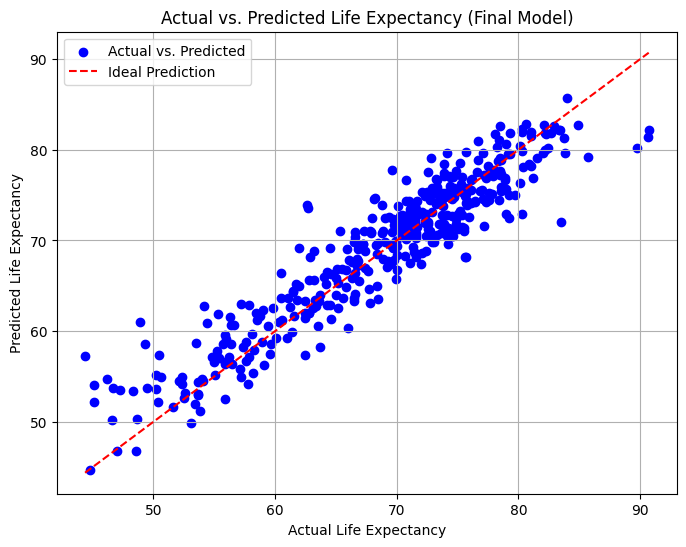

In [495]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Assuming X_train_poly, y_train, X_val_poly, y_val, and y_pred_lasso are defined

# Plotting the actual vs. predicted values for Lasso Regularization
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_lasso_poly, color='blue', label='Actual vs. Predicted')

# Adding labels and title
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs. Predicted Life Expectancy (Final Model)')

# Adding a diagonal line for reference (ideal prediction)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='Ideal Prediction')

# Adding legend
plt.legend()

# Adding gridlines
plt.grid(True)

# Show plot
plt.show()
